# Kaggle Data Challenge
## IBM HR Analytics Employee Attrition & Performance
Source: https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

This started as a project I did for Wharton Analytics challenge. I did preliminary EDA and fit to several models in Python. I wrote a writeup in word in order to submit in a required format. 
After the challenge, I have been constantly thinking about improving what I have done. So, I have included further analysis here and made another Jupyter notebook format for easy access, reading, and adaptation.

## EDA: Who are the employees?

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb

In [2]:
hrdata = pd.read_csv('WAFhr-attrition.csv')

In [3]:
print(hrdata.shape)
hrdata.head()

(1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
hrdata.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
numerical_df=hrdata.select_dtypes(include=np.number)
categorical_df=hrdata.select_dtypes(exclude=np.number)
numeric_cols=list(numerical_df.columns)
categorical_cols=list(categorical_df.columns)

The given data has 1470 rows for each employee and 35 columns describing their attributes, which includes age, gender, department, education, job level, job involvement, etc.

The categorical attributes include: ‘Attrition’, ‘BusinessTravel’, ‘Department’, ‘EducationField’, ‘Gender’, ‘JobRole’, ‘MaritalStatus’, ‘Over18’, ‘OverTime’

And the numberical attributes include: ‘Age’, ‘DailyRate’, ‘DistanceFromHome’, ‘Education’, ‘EnvironmentSatisfaction’, ‘HourlyRate’, ‘JobInvolvement’, ‘JobLevel’, ‘JobSatisfaction’, ‘MonthlyIncome’, ‘MonthlyRate’, ‘NumCompaniesWorked’, ‘PercentSalaryHike’, ‘PerformanceRating’, ‘RelationshipSatisfaction’, ‘StockOptionLevel’, ‘TotalWorkingYears’, ‘TrainingTimesLastYear’, ‘WorkLifeBalance’, ‘YearsAtCompany’, ‘YearsInCurrentRole’, ‘YearsSinceLastPromotion’, ‘YearsWithCurrManager’

### Summary information about the employees:

/Users/tanya/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


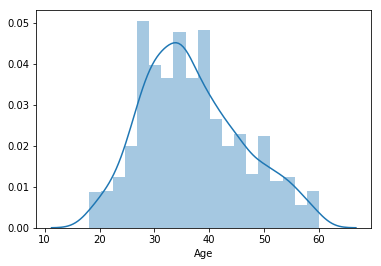

In [6]:
# Distribution of employees’ age
sb.distplot(hrdata['Age'])

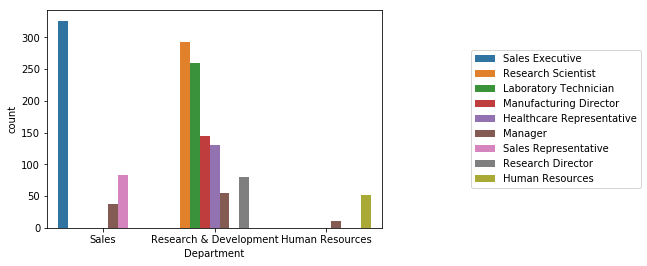

In [7]:
#Graph of functions within department
depjob = sb.countplot(data = hrdata, x='Department',hue='JobRole')
depjob.legend(loc='center left',bbox_to_anchor=(1.25,0.5),ncol=1)
plt.show()

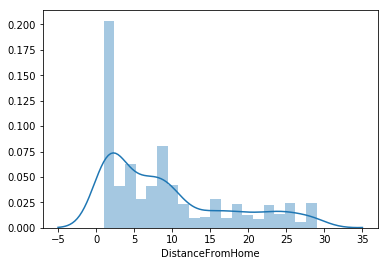

In [8]:
sb.distplot(hrdata['DistanceFromHome'],bins=20)

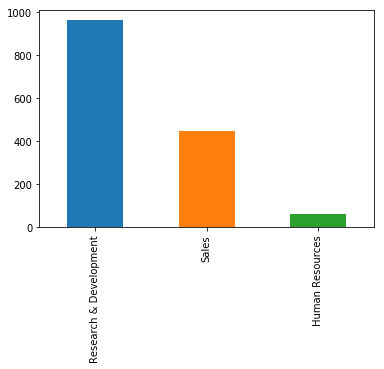

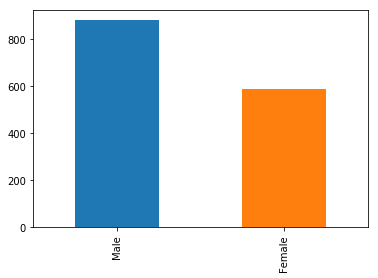

In [9]:
#Distribution of employees' Department
hrdata['Department'].value_counts().plot(kind='bar')
plt.show()
#Distribution of employees' gender
hrdata['Gender'].value_counts().plot(kind='bar')

The age of employees is close to normally distributed with median age around 35. Most of the employees are in the age range from 25 to 45.

There are more male than female employees, with 60% male and 40% female.

A significant portion of employees live very close to their workplace, with around 28% living 1-2 distance units from home and the majority of the employees living within 10 distance units.

The majority of employees, 65.4%, work in the Research & Development department. Followed by the Sales department at 30.3%. Then, the HR department has 4.3% of employees. For job roles, sales executive is the most popular role and is the majority of role in Sales department. The second and third most popular role are research scientist and laboratory technician within the R&D department.

### Employees and Attrition

These data contains employees who left the company and also those who stay. Around 83.8% of employees stay with the company, while 16.1% left IBM. We can see that the dataset is imbalanced. Employee attrition can be related to many factors. I will explore some of them with significant implications here.

In [10]:
hrdata['Attrition'].value_counts(normalize=True)

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

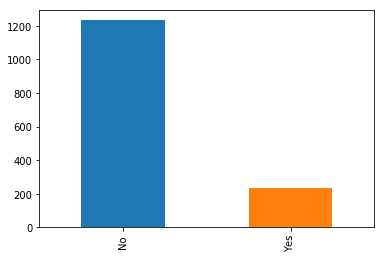

In [11]:
hrdata['Attrition'].value_counts().plot(kind='bar')

Attrition with respect to other attributes:

Some observations are that attrition rate is higher for younger employees. Employees with low environment satisfaction tend to leave the job. Employees with low job level, low income, and less number of years at the company tend to have higher attrition.

In [12]:
def kdePlot(var):
    fig = plt.figure(figsize=(12,4))
    ax=sb.kdeplot(hrdata.loc[(hrdata['Attrition'] == 'No'),var] , color='r',shade=True, label='No Attrition') 
    ax=sb.kdeplot(hrdata.loc[(hrdata['Attrition'] == 'Yes'),var] , color='g',shade=True, label='Attrition')
    plt.title('Employee Attrition with respect to {}'.format(var))

/Users/tanya/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/tanya/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/tanya/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


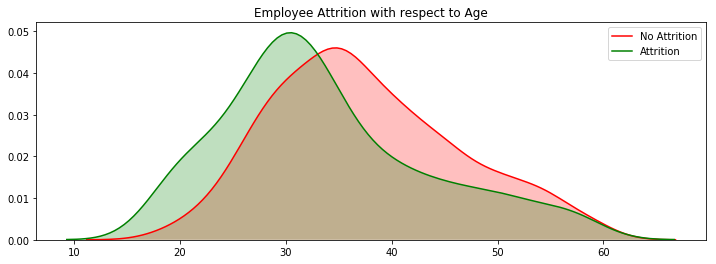

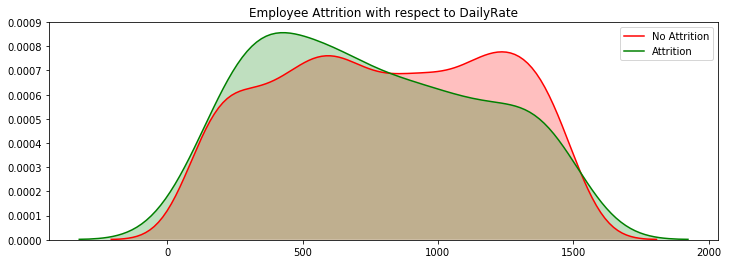

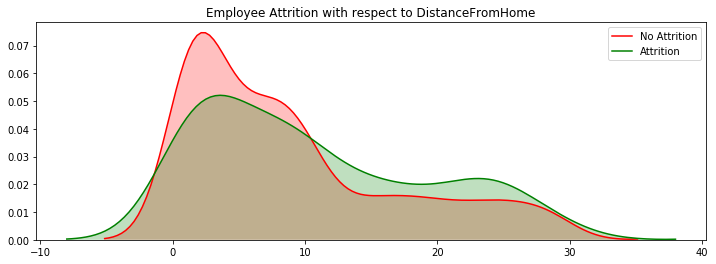

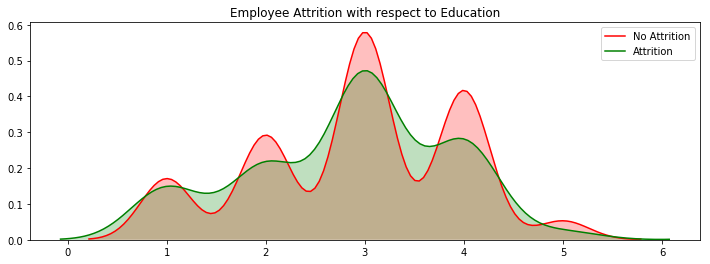

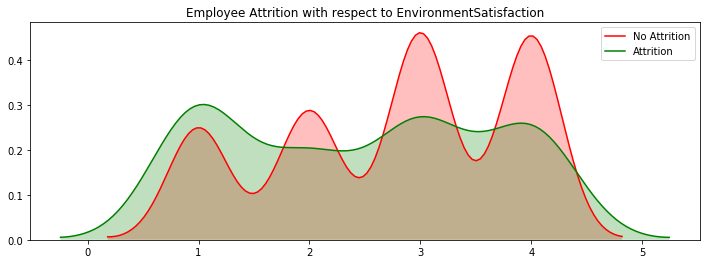

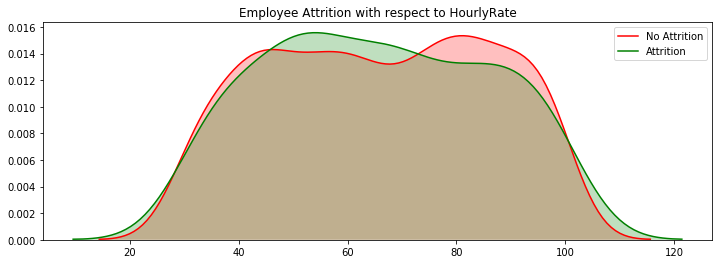

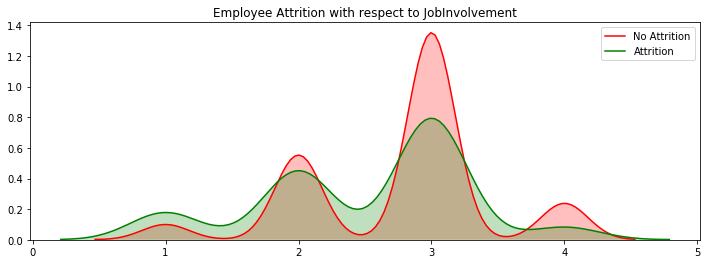

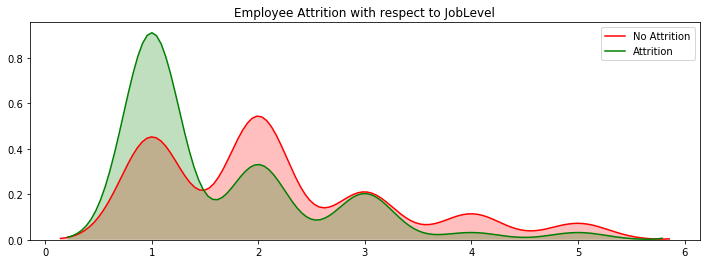

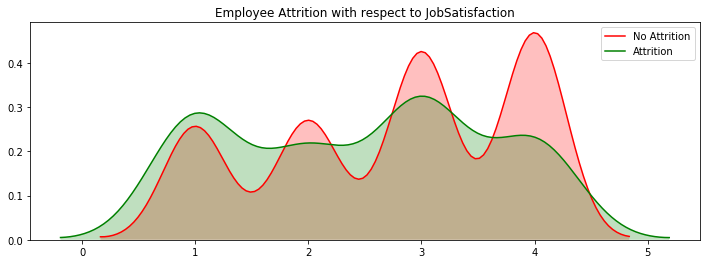

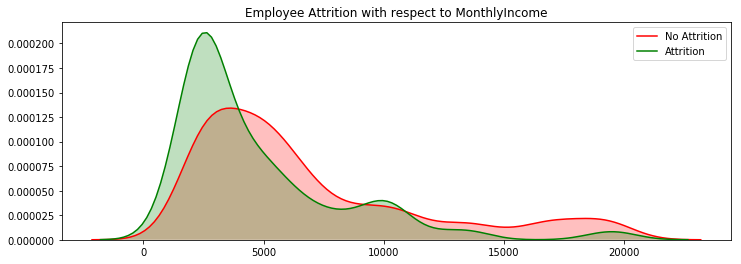

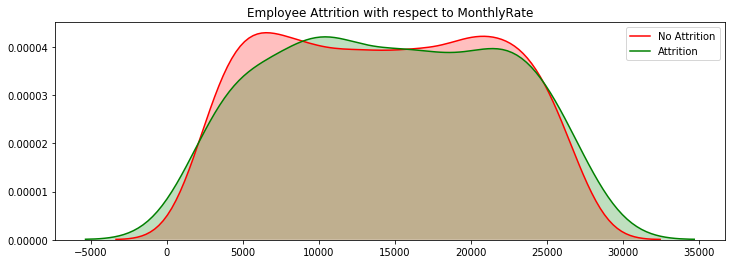

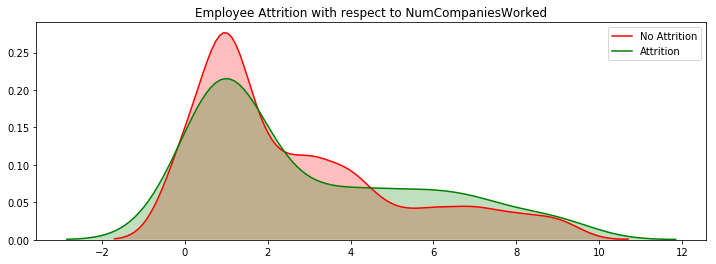

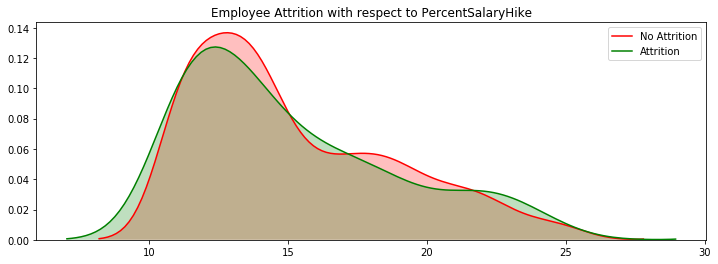

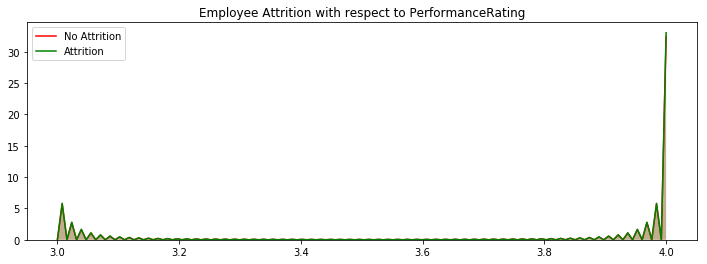

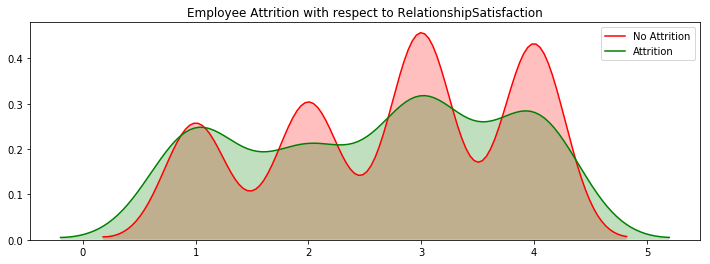

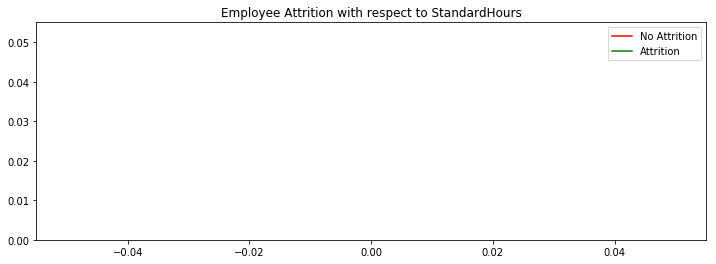

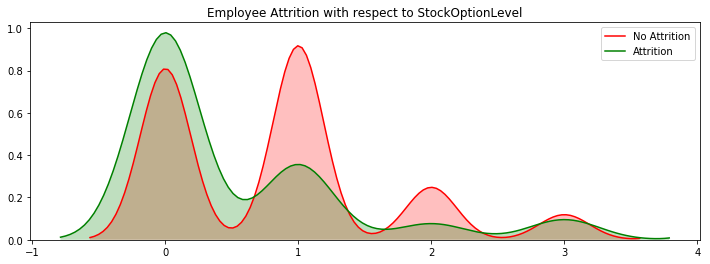

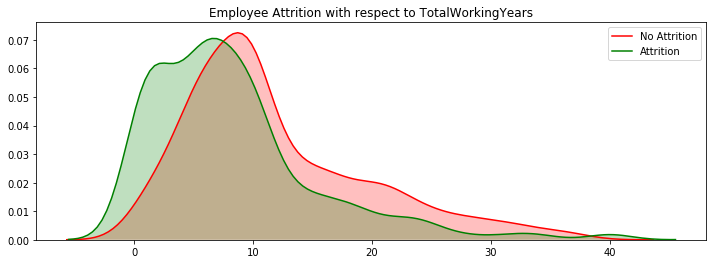

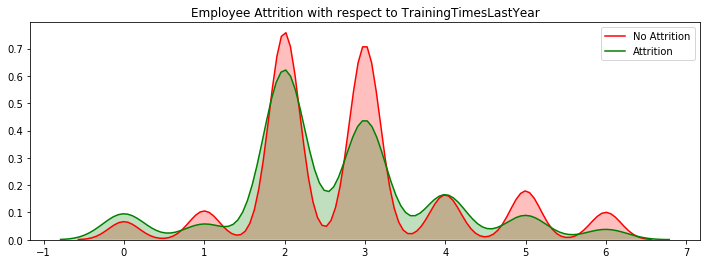

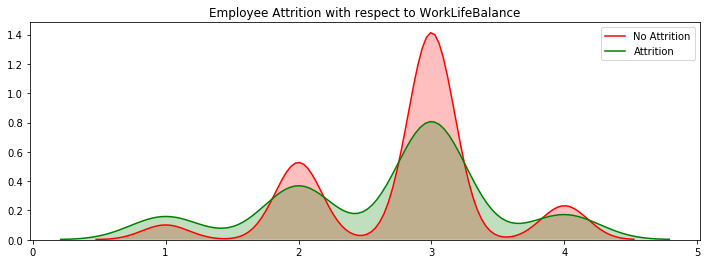

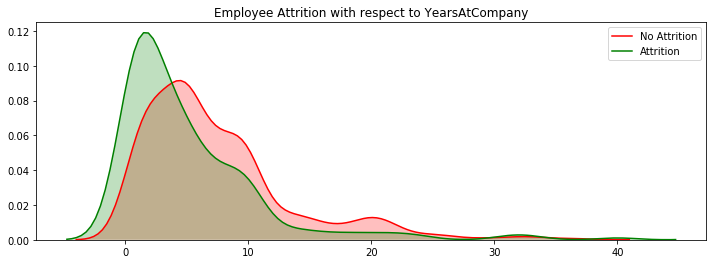

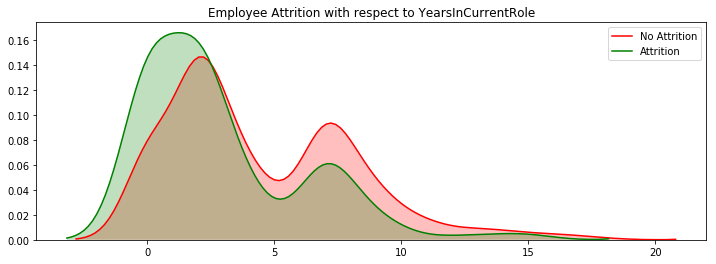

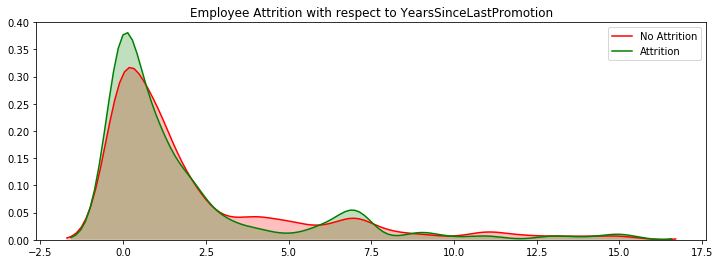

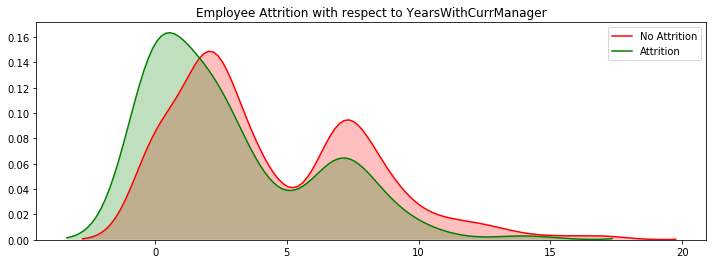

In [13]:
numerical_df=hrdata.select_dtypes(include=np.number)
numeric_cols_kdeplot=list(numerical_df.columns)
remove_columns=['Age','DistanceFromHome','Education','EmployeeCount','EmployeeNumber',
'EnvironmentSatisfaction' ,'HourlyRate','JobInvolvement','JobSatisfaction','MonthlyRate','NumCompaniesWorked',
'PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StandardHours','StockOptionLevel','TotalWorkingYears',
'TrainingTimesLastYear','WorkLifeBalance','YearsSinceLastPromotion']
#
coltoplot = ['Age','DailyRate',
       'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']
for l in remove_columns:
    numeric_cols_kdeplot.remove(l)
#for n in numeric_cols_kdeplot:
for n in coltoplot:
    kdePlot(n)

### Models to Forecast Attrition

First, I made Attrition numerical by replacing Yes with 1 and No with 0. From looking into the data, I could see that EmployeeCount and StandardHours are the same across all the employees, and EmployeeNumber is just the order of the employees. These columns should not be used in the model. Then, I plotted the heat map to see the correlation between the columns.

In [14]:
# change attrition to 0,1
hrdata['Attrition']=np.where(hrdata['Attrition']=='No',0,1)
hr_data=hrdata.drop(['EmployeeCount', 'StandardHours','EmployeeNumber','JobLevel'], axis=1)

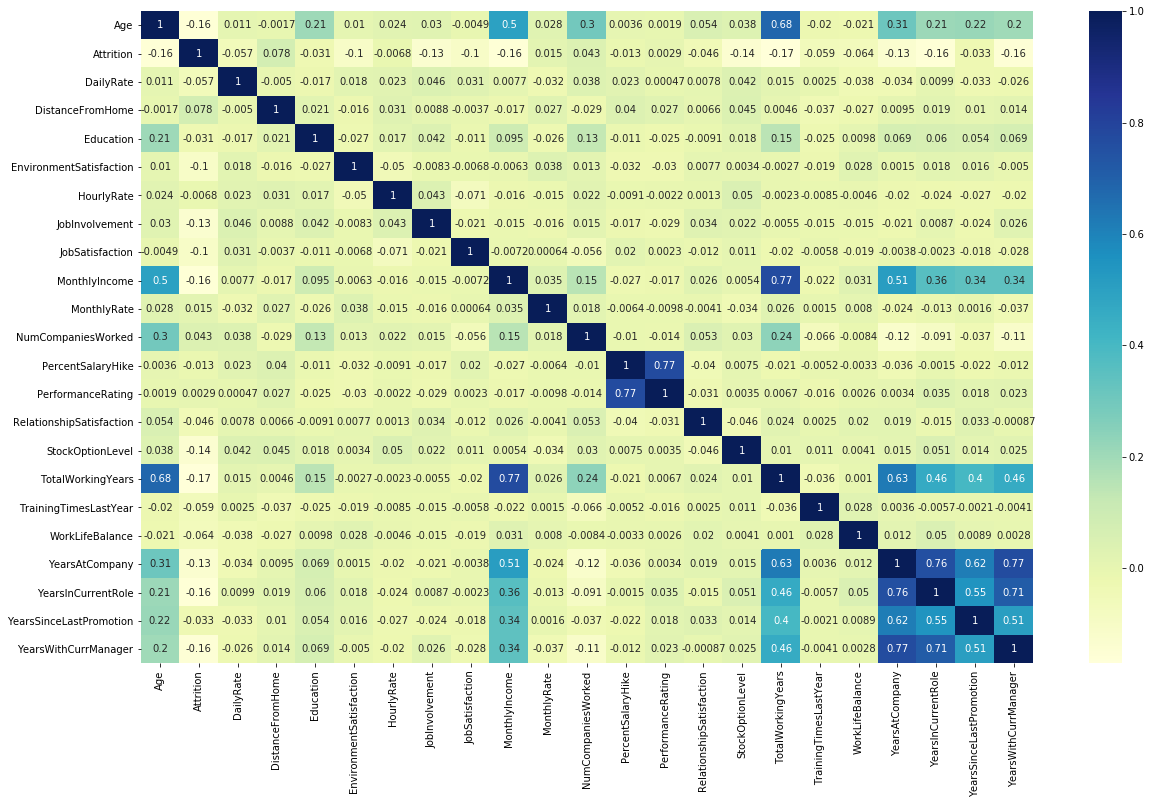

In [16]:
corr_matrix = hr_data.corr()
f , ax = plt.subplots(figsize=(20,12))
sb.heatmap(corr_matrix, annot=True, cmap="YlGnBu")

There is very high correlation between JobLevel & MonthlyIncome, at 95%. There are also significant correlation between PerformanceRating & PercentSalaryHike, JobLevel & TotalWorkingYears, YearsWithCurrentManager & YearsAtCompany. All these correlations make sense logically. Still, to reduce collinearity, I choose to only exclude JobLevel from the model because I believe it is represented in MonthlyIncome, which represents more information. To fit a model, I do one-hot encoding for the categorical variables. I first tried to fit a simple logistic regression to the training data.

In [32]:
numerical_df=hr_data.select_dtypes(include=np.number)
categorical_df=hr_data.select_dtypes(exclude=np.number)
numeric_cols=list(numerical_df.columns)
categorical_cols=list(categorical_df.columns)

categorical_df_dummies=pd.get_dummies(hr_data[categorical_cols],drop_first=True)
final_df=pd.concat([categorical_df_dummies,numerical_df],axis=1)
final_df.head()

,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,1,0,1,1,0,0,0,0,0,...,3,1,0,8,0,1,6,4,0,5
1,1,0,1,0,1,0,0,0,0,1,...,4,4,1,10,3,3,10,7,1,7
2,0,1,1,0,0,0,0,1,0,1,...,3,2,0,7,3,3,0,0,0,0
3,1,0,1,0,1,0,0,0,0,0,...,3,3,0,8,3,3,8,7,3,0
4,0,1,1,0,0,0,1,0,0,1,...,3,4,1,6,3,3,2,2,2,2


In [34]:
y=final_df.Attrition
X=final_df.drop(['Attrition'], axis=1)

In [35]:
#split with 20%
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,roc_auc_score,precision_recall_curve,confusion_matrix,precision_score,confusion_matrix
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [36]:
def model(mod,model_name,x_tr,y_tr,x_tes,y_te):
    mod.fit(x_tr,y_tr)
    pred_dt=mod.predict(x_tes)
    print("-----",model_name,"-----")
    print("Accuracy: ",accuracy_score(pred_dt,y_te))
    print("ROC AUC Score:  ",roc_auc_score(pred_dt,y_te))
    cm=confusion_matrix(pred_dt,y_te)
    print("Confusion Matrix:  \n",cm)
    print("-----Classification Report-----\n",classification_report(pred_dt,y_te))

#### Simple Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver='lbfgs',max_iter=3000)
model(lr,"Simple Logistic Regression",X_train,y_train,X_test,y_test)

----- Simple Logistic Regression -----
Accuracy:  0.8571428571428571
ROC AUC Score:   0.7472527472527473
Confusion Matrix:  
 [[239  34]
 [  8  13]]
-----Classification Report-----
               precision    recall  f1-score   support

           0       0.97      0.88      0.92       273
           1       0.28      0.62      0.38        21

    accuracy                           0.86       294
   macro avg       0.62      0.75      0.65       294
weighted avg       0.92      0.86      0.88       294



/Users/tanya/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


The model has a high accuracy of 85%, but consider that the precision for Attrition 1 is very low and the recall is quite low as well, and this is also reflected in the low f1-score. As I mentioned above, the dataset is imbalanced as there is 83.8% of 0 and 16.1% of 1 for Attrition. It is important to note that the high accuracy may be very misleading. If the model just always predict 0s, then the accuracy of this model is already 83.8%. So, I look into the confusion matrix and calculate precision and recall for each model.

Resampling is a common way to tackle the problem. Here, I choose to use over-sampling, which is adding instances from the under-represented class (1) sampled with replacement. I think over-sampling is better for this case because I do not have a lot of data and would like to keep all the useful information in the instances with Attrition 0s. I fitted the over- sampled data using 3 models: Logistic Regression, Decision Tree, and Random Forest.

#### Logistic Regression with Over-Sampling

In [39]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
X_sm, y_sm=smote.fit_sample(X,y)
X_train_sm,X_test_sm,y_train_sm,y_test_sm=train_test_split(X_sm,y_sm,test_size=0.2,random_state=100)
lr_sm=LogisticRegression(solver='lbfgs',max_iter=3000)
model(lr_sm,"Logistic Regression with over-sampling",X_train_sm,y_train_sm,X_test_sm,y_test_sm)

----- Logistic Regression with over-sampling -----
Accuracy:  0.8238866396761133
ROC AUC Score:   0.8239344262295081
Confusion Matrix:  
 [[202  42]
 [ 45 205]]
-----Classification Report-----
               precision    recall  f1-score   support

           0       0.82      0.83      0.82       244
           1       0.83      0.82      0.82       250

    accuracy                           0.82       494
   macro avg       0.82      0.82      0.82       494
weighted avg       0.82      0.82      0.82       494



/Users/tanya/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [40]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train_sm,X_train_sm)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.287877
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              Attrition   No. Observations:                 1972
Model:                          Logit   Df Residuals:                     1929
Method:                           MLE   Df Model:                           42
Date:                Wed, 28 Oct 2020   Pseudo R-squ.:                  0.5847
Time:                        15:05:55   Log-Likelihood:                -567.69
converged:                       True   LL-Null:                       -1366.9
                                        LLR p-value:                3.914e-308
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
BusinessTravel_Travel_Frequently      0.2189      0.271      0

#### Decision Tree with Over-Sampling

In [41]:
from sklearn.tree import DecisionTreeClassifier
dt_sm=DecisionTreeClassifier() 
model(dt_sm,"Decision Tree with over-sampling",X_train_sm,y_train_sm,X_test_sm,y_test_sm)

----- Decision Tree with over-sampling -----
Accuracy:  0.8481781376518218
ROC AUC Score:   0.8483208710481438
Confusion Matrix:  
 [[212  40]
 [ 35 207]]
-----Classification Report-----
               precision    recall  f1-score   support

           0       0.86      0.84      0.85       252
           1       0.84      0.86      0.85       242

    accuracy                           0.85       494
   macro avg       0.85      0.85      0.85       494
weighted avg       0.85      0.85      0.85       494



#### Random Forest with Over-Sampling

In [42]:
from sklearn.ensemble import RandomForestClassifier
rf_sm=RandomForestClassifier() #n_estimators=10,max_depth=4
model(rf_sm,"Random Forest with over-sampling",X_train_sm,y_train_sm,X_test_sm,y_test_sm)

----- Random Forest with over-sampling -----
Accuracy:  0.9453441295546559
ROC AUC Score:   0.9457020997375329
Confusion Matrix:  
 [[237  17]
 [ 10 230]]
-----Classification Report-----
               precision    recall  f1-score   support

           0       0.96      0.93      0.95       254
           1       0.93      0.96      0.94       240

    accuracy                           0.95       494
   macro avg       0.95      0.95      0.95       494
weighted avg       0.95      0.95      0.95       494



The over-sampled logistic regression model has a slightly lower accuracy than the simple model, but it has a significantly higher precision and recall for Attrition of 1. The decision tree and random forest models give higher accuracy, precision, and recall, with the random forest model giving the best scores.

Furthermore, I analyzed the coefficients from the logistic regression model and their significance. Some significant negative coefficients are education field, being married, job involvement, etc. And some positive coefficients are doing overtimes, age, number of companies they’ve worked at, performance rating, and percent of salary hike.

The HR team could use these models to predict attrition of the employees, and devise future plans to hire more people in certain roles. Or, the team can learn useful information from the characteristics of employees with attrition and the significance of each factor in determining the attrition in the model, so they could develop plans to incentivize employees in the aspects that would make them stay with IBM or know what to look for in hiring people for certain roles.